In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
dataset = pd.read_csv('spam.csv')
y = dataset.iloc[:, 0].values

In [75]:
print(y)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [76]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [77]:
dataset = dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [78]:
dataset.columns = ['labels', 'data']

In [79]:
dataset.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

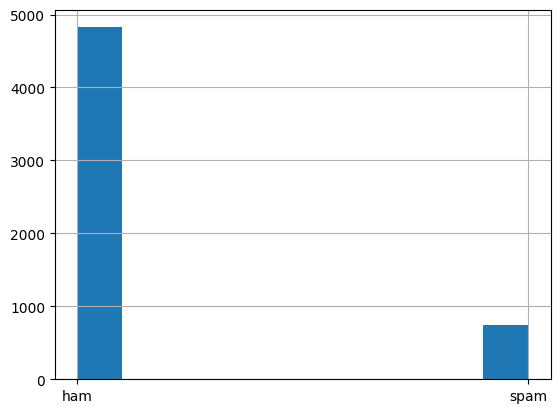

In [80]:
dataset['labels'].hist()

In [81]:
from sklearn.model_selection import train_test_split
dfTrain, dfTest, Ytrain_df_uncoded, Ytest_df_uncoded = train_test_split(dataset['data'], y, test_size = 0.25, random_state = 0)

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain_df = le.fit_transform(Ytrain_df_uncoded)
Ytest_df = le.transform(Ytest_df_uncoded)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
featurizer = CountVectorizer(decode_error = 'ignore')
# featurizer = TfidfVectorizer(max_features = 2000, decode_error = 'ignore')
dfTrain = featurizer.fit_transform(dfTrain)
dfTest = featurizer.transform(dfTest)

In [84]:
print(dfTrain)

  (0, 3921)	1
  (0, 6408)	1
  (0, 7289)	1
  (0, 7069)	1
  (0, 2343)	1
  (0, 4611)	1
  (1, 4611)	1
  (1, 3235)	1
  (1, 4128)	1
  (1, 3555)	1
  (1, 5528)	1
  (1, 2191)	1
  (1, 3170)	1
  (1, 4493)	1
  (1, 3273)	1
  (1, 3655)	1
  (1, 4198)	1
  (1, 5589)	1
  (1, 3210)	1
  (1, 1951)	1
  (1, 3172)	1
  (1, 5681)	1
  (1, 3436)	1
  (1, 805)	1
  (1, 6084)	1
  :	:
  (4176, 2214)	1
  (4176, 4709)	1
  (4176, 4696)	1
  (4176, 1464)	1
  (4176, 6954)	1
  (4177, 7289)	1
  (4177, 3872)	1
  (4177, 3171)	1
  (4177, 3943)	1
  (4177, 2193)	1
  (4177, 5477)	1
  (4177, 7262)	1
  (4177, 4008)	1
  (4177, 6080)	1
  (4178, 7289)	3
  (4178, 6546)	2
  (4178, 3327)	1
  (4178, 6320)	1
  (4178, 6378)	1
  (4178, 932)	1
  (4178, 791)	1
  (4178, 2062)	1
  (4178, 3191)	1
  (4178, 6178)	1
  (4178, 7168)	2


In [85]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(dfTrain, Ytrain_df)

MultinomialNB()

In [86]:
y_pred = classifier.predict(dfTest)
y_pred_prob = classifier.predict_proba(dfTest)

In [87]:
print(y_pred)
print(y_pred_prob)

[0 0 0 ... 0 0 1]
[[9.99999987e-01 1.28204716e-08]
 [9.95863006e-01 4.13699384e-03]
 [1.00000000e+00 1.11820786e-12]
 ...
 [9.99996579e-01 3.42112184e-06]
 [1.00000000e+00 1.16126479e-11]
 [1.46554225e-09 9.99999999e-01]]


In [88]:
print("Model score (train set) : ", classifier.score(dfTrain, Ytrain_df))
print("Model score (test set)  : ", classifier.score(dfTest, Ytest_df))

Model score (train set) :  0.9930605407992342
Model score (test set)  :  0.9863603732950467


In [89]:
from sklearn.metrics import f1_score

Ptrain = classifier.predict(dfTrain)
Ptest = classifier.predict(dfTest)
print("F1 score (train set) : ", f1_score(Ytrain_df, Ptrain))
print("F1 score (test set)  : ", f1_score(Ytest_df, Ptest))

F1 score (train set) :  0.9733210671573137
F1 score (test set)  :  0.9501312335958005


In [90]:
from sklearn.metrics import roc_auc_score

Prob_train = classifier.predict_proba(dfTrain)[:,1]
Prob_test = classifier.predict_proba(dfTest)[:,1]
print("AUC score (train set) : ", roc_auc_score(Ytrain_df, Prob_train))
print("AUC score (test set)  : ", roc_auc_score(Ytest_df, Prob_test))

AUC score (train set) :  0.9912743305193017
AUC score (test set)  :  0.9881075666774188


In [91]:
import seaborn as sn
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

Confusion Metrix (train set) : 
 [[3621    8]
 [  21  529]]


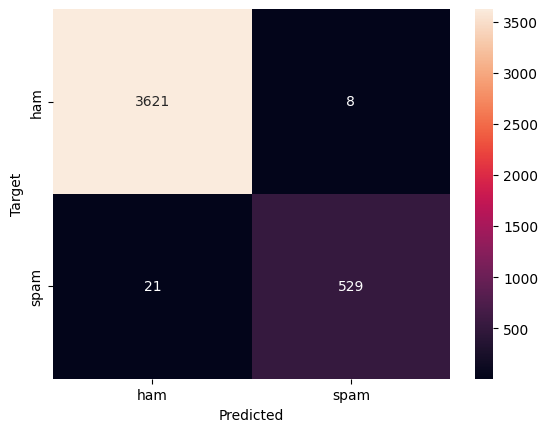

In [92]:
from sklearn.metrics import confusion_matrix


cm_train = confusion_matrix(Ytrain_df, Ptrain)
cm_test = confusion_matrix(Ytest_df, Ptest)
print("Confusion Metrix (train set) : \n", cm_train)
plot_cm(cm_train)


Confusion Metrix (test set)  : 
 [[1193    3]
 [  16  181]]


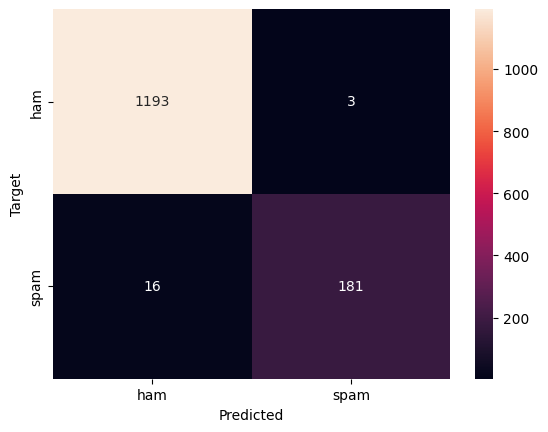

In [93]:

print("\nConfusion Metrix (test set)  : \n", cm_test)
plot_cm(cm_test)


In [94]:
from wordcloud import WordCloud

def visualize(label):
  words = ''
  for msg in dataset[dataset['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

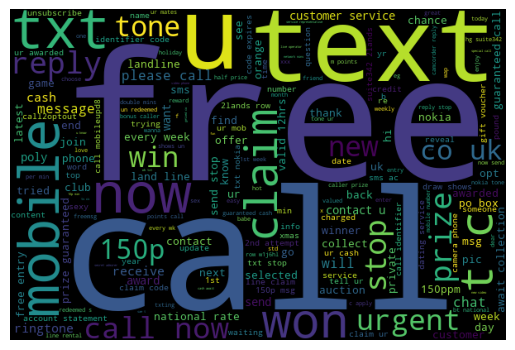

In [95]:
visualize('spam')

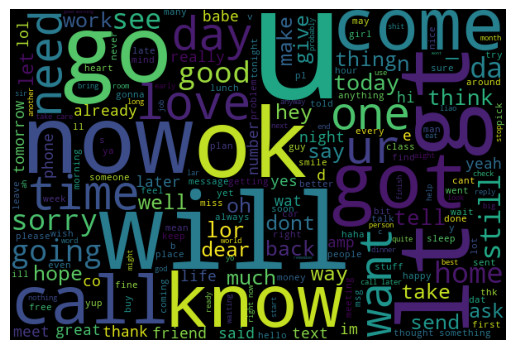

In [96]:
visualize('ham')